In [29]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import pickle
import matplotlib.animation as animation
import scipy.interpolate as interp

In [2]:
orig = pickle.load(open('LCs_hats5_1712_f_wave.pkl','rb'))
second = pickle.load(open('LCs_hats5_15_s_f_wl.pkl','rb'))

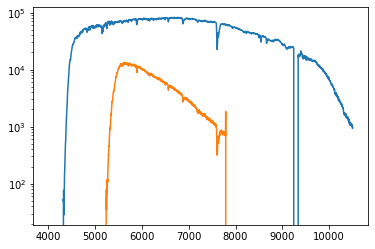

In [5]:
%matplotlib inline
plt.plot(orig["spectra"]["wavelengths"], orig["optimal spectra"]["HATS5b"][2])
plt.plot(second["spectra"]["wavelengths"], second["optimal spectra"]["HATS5b2"][2])
plt.yscale("log")

In [20]:
# read in throughputs, taken from http://www.lco.cl/technical-documentation/imacs-user-manual/
columns = ["150-x", "150-y", "300-x", "300-y"]
throughputs = pd.read_csv("throughputs.csv", names = columns, skiprows=4)

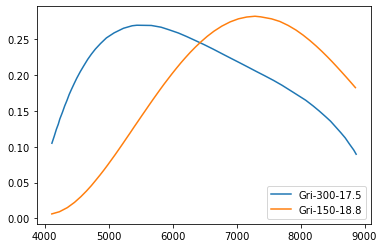

In [28]:
# 2017 disperser
plt.plot(throughputs["300-x"], throughputs["300-y"], label = "Gri-300-17.5")
# 2015 disperser
plt.plot(throughputs["150-x"], throughputs["150-y"], label = "Gri-150-18.8")
plt.legend()

In [126]:
# cut out all zero flux space
nonzero_2015_wave = (second["spectra"]["wavelengths"])[second["optimal spectra"]["HATS5b2"][2] != 0]
nonzero_2015_spec = (second["optimal spectra"]["HATS5b2"][2])[second["optimal spectra"]["HATS5b2"][2] != 0]

nonzero_2017_wave = (orig["spectra"]["wavelengths"])[orig["optimal spectra"]["HATS5b"][2] != 0]
nonzero_2017_spec = (orig["optimal spectra"]["HATS5b"][2])[orig["optimal spectra"]["HATS5b"][2] != 0]

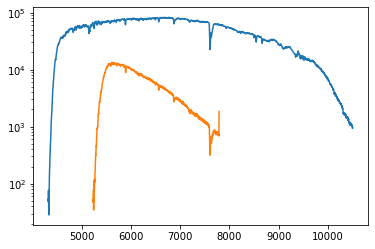

In [51]:
plt.plot(nonzero_2017_wave , nonzero_2017_spec)
plt.plot(nonzero_2015_wave , nonzero_2015_spec)
plt.yscale("log")

In [82]:
# interpolate a little
interp_15_x = interp.interp1d(np.arange(throughputs["150-x"].size),throughputs["150-x"])
stretch_15_x = interp_15_x(np.linspace(0,throughputs["150-x"].size-1,second["optimal spectra"]["wavelengths"].size))

interp_15_y = interp.interp1d(np.arange(throughputs["150-y"].size),throughputs["150-y"])
stretch_15_y = interp_15_y(np.linspace(0,throughputs["150-y"].size-1,second["optimal spectra"]["HATS5b2"][2].size))

# for 2015, cut throughput to match spectra
through_2015_x = (stretch_15_x)[np.where(stretch_15_x > nonzero_2015_wave[0])[0][0]:np.where(stretch_15_x > nonzero_2015_wave[-1])[0][0]]
through_2015_y = (stretch_15_y)[np.where(stretch_15_x > nonzero_2015_wave[0])[0][0]:np.where(stretch_15_x > nonzero_2015_wave[-1])[0][0]]

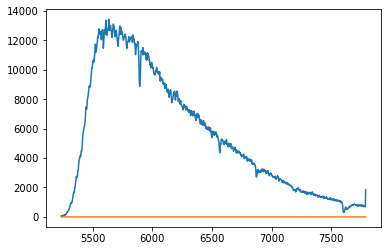

In [86]:
plt.plot(nonzero_2015_wave , nonzero_2015_spec)
plt.plot(through_2015_x, through_2015_y)
#plt.plot(throughputs["150-x"], throughputs["150-y"], label = "Gri-150-18.8")

In [96]:
# interpolate to the same scale now
interp_15_x = interp.interp1d(np.arange(through_2015_x.size),through_2015_x)
stretch_15_x = interp_15_x(np.linspace(0,through_2015_x.size-1,nonzero_2015_wave.size))

interp_15_y = interp.interp1d(np.arange(through_2015_y.size),through_2015_y)
stretch_15_y = interp_15_y(np.linspace(0,through_2015_y.size-1,nonzero_2015_spec.size))

In [98]:
# divide by throughput for true flux
true_2015 = nonzero_2015_spec/stretch_15_y

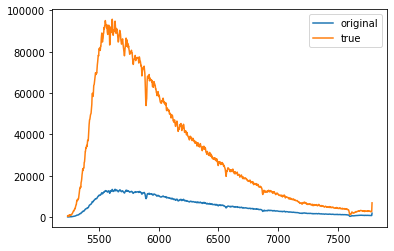

In [101]:
plt.plot(nonzero_2015_wave , nonzero_2015_spec, label = "original")
plt.plot(nonzero_2015_wave , true_2015, label = "true")
plt.legend()

In [172]:
# again interpolate a little 
interp_17_x = interp.interp1d(np.arange(throughputs["300-x"].size),throughputs["300-x"])
stretch_17_x = interp_17_x(np.linspace(0,throughputs["300-x"].size-1,orig["optimal spectra"]["wavelengths"].size))

interp_17_y = interp.interp1d(np.arange(throughputs["300-y"].size),throughputs["300-y"])
stretch_17_y = interp_17_y(np.linspace(0,throughputs["300-y"].size-1,orig["optimal spectra"]["HATS5b"][2].size))

# get a nan thing that we need to get rid of 
stretch_17_x = stretch_17_x[np.logical_not(np.isnan(stretch_17_x))]
stretch_17_y = stretch_17_y[np.logical_not(np.isnan(stretch_17_y))]

# for 2017, cut flux off at max throughput value (seems weird the throughput doesn't cover full wavelength range?)
# and cut off throughput at minimum flux value
through_2017_x = (stretch_17_x)[np.where(stretch_17_x > nonzero_2017_wave[0])[0][0]:]
through_2017_y = (stretch_17_y)[np.where(stretch_17_x > nonzero_2017_wave[0])[0][0]:]

nonzero_2017_wave_2 = (nonzero_2017_wave)[:np.where(nonzero_2017_wave > np.nanmax(through_2017_x))[0][0]]
nonzero_2017_spec_2 = (nonzero_2017_spec)[:np.where(nonzero_2017_wave > np.nanmax(through_2017_x))[0][0]]

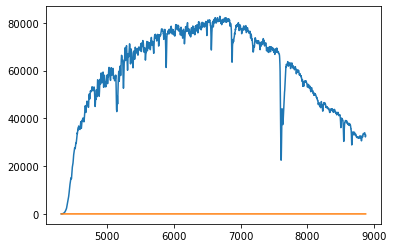

In [173]:
plt.plot(nonzero_2017_wave_2, nonzero_2017_spec_2)
plt.plot(through_2017_x, through_2017_y)
#plt.plot(throughputs["300-x"], throughputs["300-y"], label = "Gri-300-17.5")

In [177]:
# interpolate to the same scale now
interp_17_x = interp.interp1d(np.arange(through_2017_x.size),through_2017_x)
stretch_17_x = interp_17_x(np.linspace(0,through_2017_x.size-1,nonzero_2017_wave_2.size))

interp_17_y = interp.interp1d(np.arange(through_2017_y.size),through_2017_y)
stretch_17_y = interp_17_y(np.linspace(0,through_2017_y.size-1,nonzero_2017_spec_2.size))

In [178]:
# divide by throughput for true flux
true_2017 = nonzero_2017_spec_2/stretch_17_y

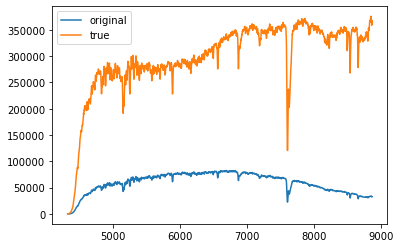

In [180]:
plt.plot(nonzero_2017_wave_2, nonzero_2017_spec_2, label = "original")
plt.plot(nonzero_2017_wave_2, true_2017, label = "true")
plt.legend()

In [200]:
# second order scale factor - seems like an overestimate but that's probably good
factor = np.max(true_2015)/np.max(true_2017)

true_second_2017 = true_2017*factor

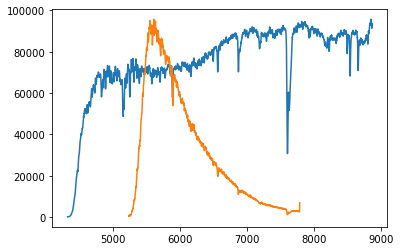

In [201]:
plt.plot(nonzero_2017_wave_2, true_second_2017)
plt.plot(nonzero_2015_wave, true_2015)

In [202]:
# observed second order 2017 - multiply by throughput again
second_2017 = true_second_2017*stretch_17_y

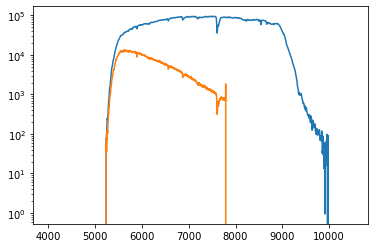

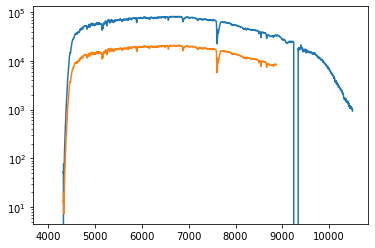

In [203]:
# compare 2015 first to second order to 2017 first to second order
plt.plot(second["spectra"]["wavelengths"], second["optimal spectra"]["HATS5b"][2])
plt.plot(second["spectra"]["wavelengths"], second["optimal spectra"]["HATS5b2"][2])
plt.yscale("log")
plt.show()

plt.plot(orig["spectra"]["wavelengths"], orig["optimal spectra"]["HATS5b"][2])
plt.plot(nonzero_2017_wave_2, second_2017)
plt.yscale("log")
plt.show()

In [209]:
# from detector space - distance between big feature peaks in 2015 is 1400-660 = 740 pixels
# 2015 data covers from ~6000 angstrom dip to big 7700 angstrom dip in 1730-1400 = 330 pixels
# 2017 data covers from ~6000 angstrom dip to big 7700 angstrom dip in 1420-665 = 755 pixels
# (they're dispersed in different directions?? wild)
# --> distance to second order in 2017 should be 755/330 * 740 ~ 1690 from big dip to big dip
# flip direction and then subtract 1690 to get final orientation
# to get back to detector space:
# detector spectra goes from ~2000 pixels in detector to ~ 5000 angstroms in wavelength
# shift in wavelength space should be 5000/2000 * 1690 ~ 4225 angstrom shift

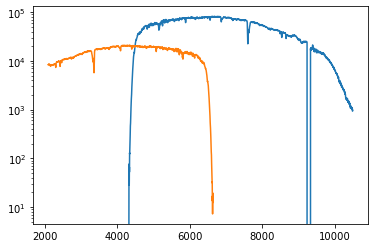

In [228]:
# np.flip(nonzero_2017_wave_2)+2000 aligns the big dip with the spectra reversed, which I then apply the shift to?
plt.plot(orig["spectra"]["wavelengths"], orig["optimal spectra"]["HATS5b"][2])
plt.plot(np.flip(nonzero_2017_wave_2)+2000-4225, second_2017)
plt.yscale("log")
plt.show()